In [7]:
import pandas as pd
import numpy as np
 
from sklearn import preprocessing 
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
  


In [9]:
df = pd.read_csv("C:\\Users\\Ishwari\\Downloads\\Shipping_data.csv")
df.head()
 


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [10]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Mode_of_Shipment']= label_encoder.fit_transform(df['Mode_of_Shipment']) 
  
df['Mode_of_Shipment'].unique()

# Flight : 0
# ship : 2
# Road : 1

array([0, 2, 1])

In [11]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Product_importance']= label_encoder.fit_transform(df['Product_importance']) 
  
df['Product_importance'].unique()
# Low : 1
# medium : 2
# high : 0

array([1, 2, 0])

In [12]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Warehouse_block']= label_encoder.fit_transform(df['Warehouse_block']) 
  
df['Warehouse_block'].unique()
# D : 3
# F : 4
# A : 0
# B : 1
# C : 2

array([3, 4, 0, 1, 2])

In [13]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,F,44,1233,1
1,2,4,0,4,5,216,2,1,M,59,3088,1
2,3,0,0,2,2,183,4,1,M,48,3374,1
3,4,1,0,3,3,176,4,2,M,10,1177,1
4,5,2,0,2,2,184,3,2,F,46,2484,1
5,6,4,0,3,1,162,3,2,F,12,1417,1
6,7,3,0,3,4,250,3,1,F,3,2371,1
7,8,4,0,4,1,233,2,1,F,48,2804,1
8,9,0,0,3,4,150,3,1,F,11,1861,1
9,10,1,0,3,2,164,3,2,F,29,1187,1


In [14]:
df.head(25)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,F,44,1233,1
1,2,4,0,4,5,216,2,1,M,59,3088,1
2,3,0,0,2,2,183,4,1,M,48,3374,1
3,4,1,0,3,3,176,4,2,M,10,1177,1
4,5,2,0,2,2,184,3,2,F,46,2484,1
5,6,4,0,3,1,162,3,2,F,12,1417,1
6,7,3,0,3,4,250,3,1,F,3,2371,1
7,8,4,0,4,1,233,2,1,F,48,2804,1
8,9,0,0,3,4,150,3,1,F,11,1861,1
9,10,1,0,3,2,164,3,2,F,29,1187,1


In [15]:
selected_features = ["Warehouse_block","Mode_of_Shipment","Cost_of_the_Product","Product_importance","Weight_in_gms"]
target = "Reached.on.Time_Y.N"
from sklearn.model_selection import train_test_split

target = 'Reached.on.Time_Y.N' 

X = df[selected_features]
y = df[target]

cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['number']).columns.tolist()

#Splitting data into Train, Validation, and Test Set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [16]:
print(selected_features)

['Warehouse_block', 'Mode_of_Shipment', 'Cost_of_the_Product', 'Product_importance', 'Weight_in_gms']


In [17]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


In [18]:
# Train and evaluate models
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} CV Accuracy: {np.mean(cv_scores):.2f} +/- {np.std(cv_scores):.2f}')
    
    # Fit model on training data
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Test Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    print('-' * 40)


Logistic Regression CV Accuracy: 0.63 +/- 0.01
Logistic Regression Test Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.58      0.43      0.49       887
           1       0.67      0.79      0.73      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.61      0.61      2200
weighted avg       0.63      0.64      0.63      2200

----------------------------------------
Random Forest CV Accuracy: 0.65 +/- 0.01
Random Forest Test Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.56      0.63      0.59       887
           1       0.73      0.67      0.69      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.65      0.64      2200
weighted avg       0.66      0.65      0.65      2200

----------------------------------------
Gradient Boosting CV Accuracy: 0.68 +/- 0.01
Gradient Boosting Test Accuracy: 0.67
              preci

In [24]:
y_pred = model.predict(X_train_val)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [25]:
logisticData=pd.DataFrame(y_pred,columns=['PREDICTION'])
logisticData

,PREDICTION
0,0
1,1
2,1
3,0
4,1
...,...
8794,0
8795,0
8796,1
8797,0


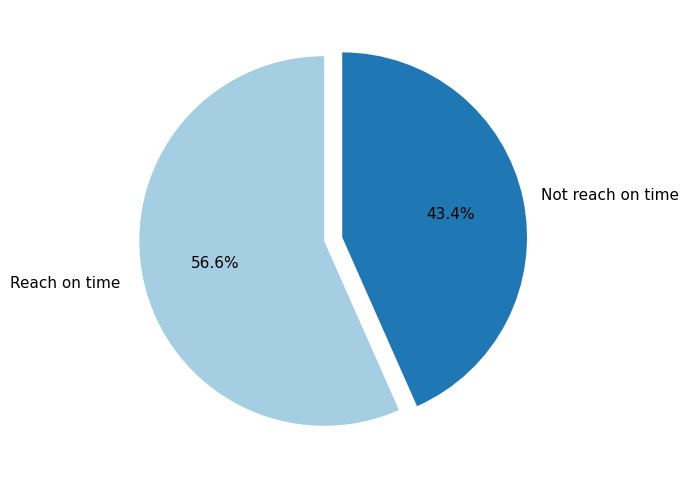

In [26]:
import matplotlib.pyplot as plt
colors=sns.color_palette("Paired")
plt.figure(figsize=(10,6))
explode=[0,0.1]
textprops={'fontsize':11}
plt.pie(logisticData["PREDICTION"].value_counts(),labels=['Reach on time ','Not reach on time'],startangle=90,colors=colors,explode=explode,autopct="%1.1f%%",textprops=textprops)

plt.show()